# Exercise 2: Non-Linearity in Higher Dimensions

Generate 5D data and use PCA to analyze linear separability in 2D projection.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [6]:
# Class A: Mean at origin with specified covariance
mean_A = np.array([0, 0, 0, 0, 0])
cov_A = np.array([
    [1.0, 0.8, 0.1, 0.0, 0.0],
    [0.8, 1.0, 0.3, 0.0, 0.0],
    [0.1, 0.3, 1.0, 0.5, 0.0],
    [0.0, 0.0, 0.5, 1.0, 0.2],
    [0.0, 0.0, 0.0, 0.2, 1.0]
])
class_A = np.random.multivariate_normal(mean_A, cov_A, 500)

# Class B: Mean shifted with specified covariance
mean_B = np.array([1.5, 1.5, 1.5, 1.5, 1.5])
cov_B = np.array([
    [1.5, -0.7, 0.2, 0.0, 0.0],
    [-0.7, 1.5, 0.4, 0.0, 0.0],
    [0.2, 0.4, 1.5, 0.6, 0.0],
    [0.0, 0.0, 0.6, 1.5, 0.3],
    [0.0, 0.0, 0.0, 0.3, 1.5]
])
class_B = np.random.multivariate_normal(mean_B, cov_B, 500)

# Combine data
X_5d = np.vstack([class_A, class_B])
y = np.hstack([np.zeros(500), np.ones(500)])

print(f"5D Dataset shape: {X_5d.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {np.bincount(y.astype(int))}")
print(f"Class A mean: {np.mean(class_A, axis=0)}")
print(f"Class B mean: {np.mean(class_B, axis=0)}")

5D Dataset shape: (1000, 5)
Labels shape: (1000,)
Class distribution: [500 500]
Class A mean: [-0.01986542 -0.07131017 -0.0092009  -0.01002533 -0.02471784]
Class B mean: [1.54707597 1.43450416 1.49769916 1.48226377 1.48334387]


In [7]:
# Manual standardization
def standardize(X):
    """Manually standardize features to zero mean and unit variance"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

# Manual PCA implementation
def manual_pca(X, n_components=2):
    """Manual PCA implementation"""
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Compute covariance matrix
    cov_matrix = np.cov(X_centered.T)
    
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvecs = np.linalg.eigh(cov_matrix)
    
    # Sort by eigenvalues (descending)
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    # Select top n_components
    components = eigenvecs[:, :n_components]
    
    # Transform data
    X_transformed = X_centered @ components
    
    # Calculate explained variance ratio
    explained_variance_ratio = eigenvals[:n_components] / np.sum(eigenvals)
    
    return X_transformed, explained_variance_ratio, components, eigenvals

In [8]:
# Standardize the 5D data
X_scaled, mean_vals, std_vals = standardize(X_5d)

# Apply manual PCA to reduce to 2D
X_2d, explained_var_ratio, components, all_eigenvals = manual_pca(X_scaled, n_components=2)

print(f"Explained variance ratio: {explained_var_ratio}")
print(f"Total explained variance: {sum(explained_var_ratio):.3f}")
print(f"All eigenvalues: {all_eigenvals}")
print(f"PCA components shape: {components.shape}")

Explained variance ratio: [0.52114219 0.15745976]
Total explained variance: 0.679
All eigenvalues: [2.60831928 0.78808689 0.68613502 0.63888029 0.28358352]
PCA components shape: (5, 2)


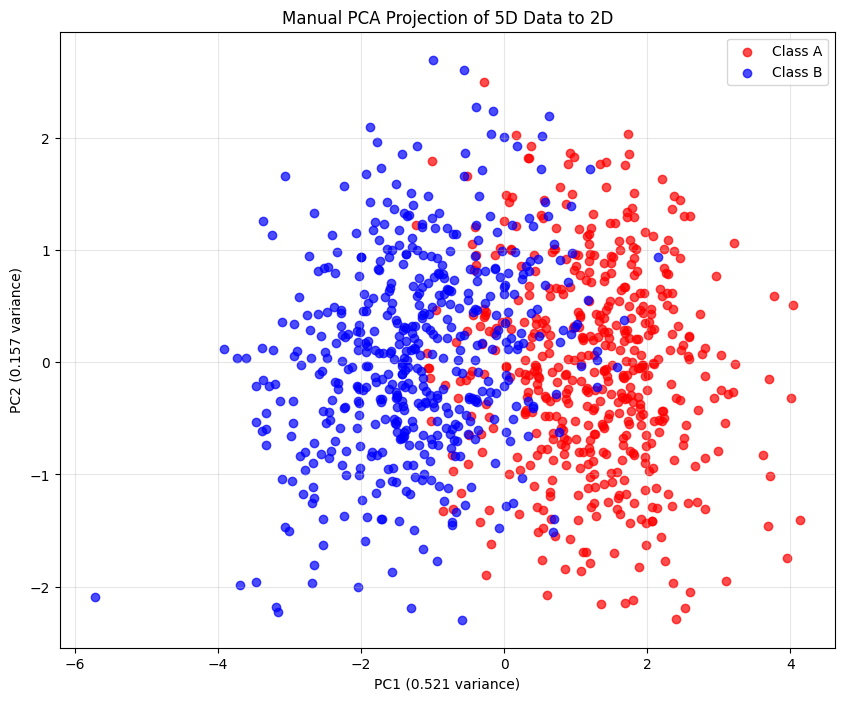

In [9]:
# Create scatter plot of 2D projection
plt.figure(figsize=(10, 8))
colors = ['red', 'blue']
class_names = ['Class A', 'Class B']

for i in range(2):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[i], label=class_names[i], alpha=0.7)

plt.xlabel(f'PC1 ({explained_var_ratio[0]:.3f} variance)')
plt.ylabel(f'PC2 ({explained_var_ratio[1]:.3f} variance)')
plt.title('Manual PCA Projection of 5D Data to 2D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

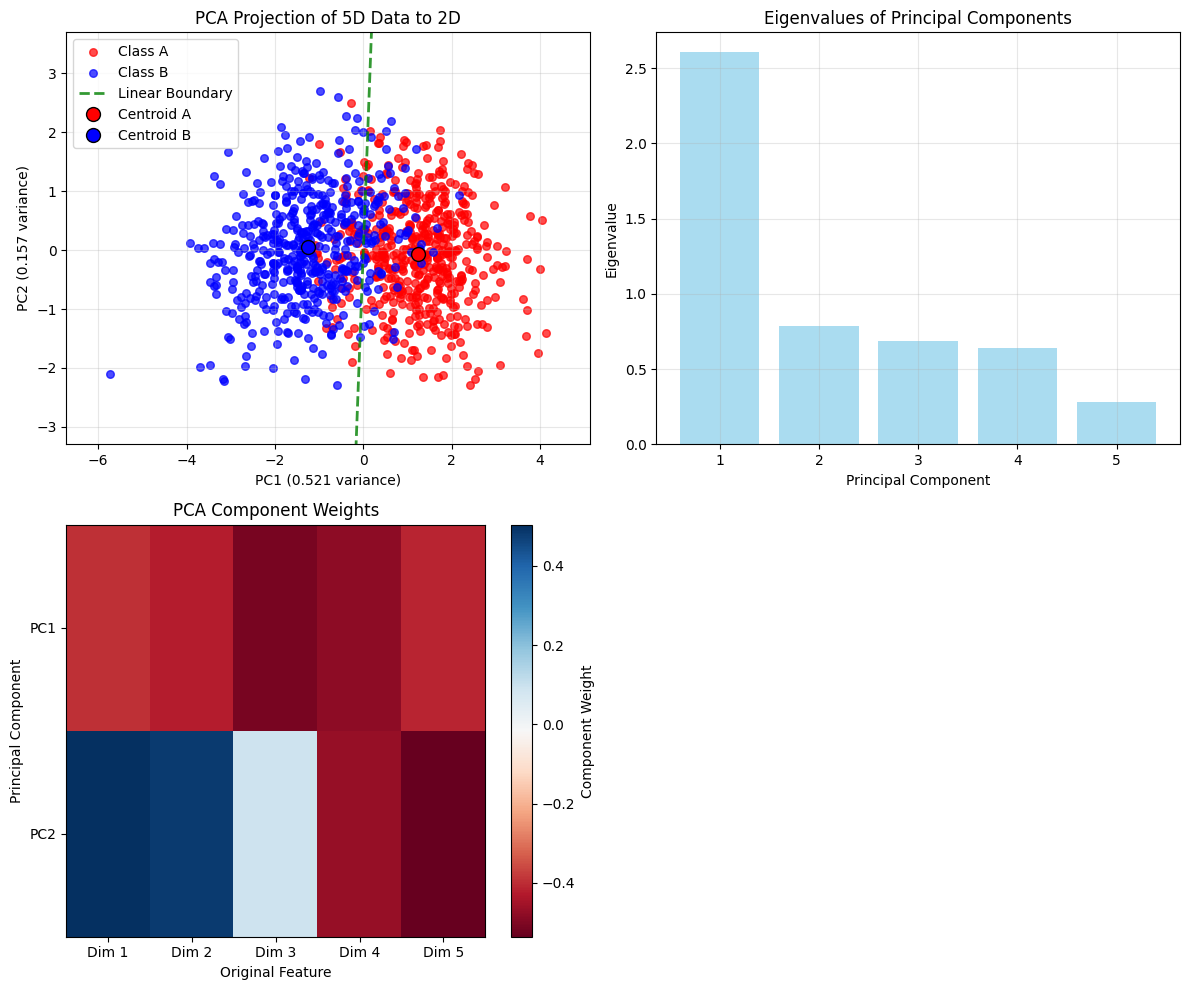

In [14]:
plt.figure(figsize=(12, 10))

# Main scatter plot
plt.subplot(2, 2, 1)
colors = ['red', 'blue']
class_names = ['Class A', 'Class B']

for i in range(2):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[i], label=class_names[i], alpha=0.7, s=30)

plt.xlabel(f'PC1 ({explained_var_ratio[0]:.3f} variance)')
plt.ylabel(f'PC2 ({explained_var_ratio[1]:.3f} variance)')
plt.title('PCA Projection of 5D Data to 2D')
plt.legend()
plt.grid(True, alpha=0.3)

# Add decision boundary visualization (simple linear separator)
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1

# Calculate centroids
centroid_A = np.mean(X_2d[y == 0], axis=0)
centroid_B = np.mean(X_2d[y == 1], axis=0)

# Simple linear decision boundary (perpendicular bisector of centroids)
mid_point = (centroid_A + centroid_B) / 2
direction = centroid_B - centroid_A
perpendicular = np.array([-direction[1], direction[0]])
perpendicular = perpendicular / np.linalg.norm(perpendicular)

# Plot decision boundary
t = np.linspace(-10, 10, 100)
boundary_points = mid_point[:, np.newaxis] + perpendicular[:, np.newaxis] * t
plt.plot(boundary_points[0], boundary_points[1], 'g--', alpha=0.8, linewidth=2, label='Linear Boundary')
plt.plot(centroid_A[0], centroid_A[1], 'ro', markersize=10, markeredgecolor='black', label='Centroid A')
plt.plot(centroid_B[0], centroid_B[1], 'bo', markersize=10, markeredgecolor='black', label='Centroid B')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()

# Eigenvalue plot
plt.subplot(2, 2, 2)
plt.bar(range(1, len(all_eigenvals) + 1), all_eigenvals, alpha=0.7, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.grid(True, alpha=0.3)


# Component weights heatmap
plt.subplot(2, 2, 3)
plt.imshow(components.T, cmap='RdBu', aspect='auto')
plt.colorbar(label='Component Weight')
plt.xlabel('Original Feature')
plt.ylabel('Principal Component')
plt.title('PCA Component Weights')
plt.xticks(range(5), [f'Dim {i+1}' for i in range(5)])
plt.yticks(range(2), ['PC1', 'PC2'])

plt.tight_layout()
plt.show()

## Analysis

After PCA projection, the classes show some overlap but remain distinguishable. The linear separability depends on the amount of variance captured by the first two principal components.

In [11]:
print("\n1. RELATIONSHIP BETWEEN THE TWO CLASSES:")
print(f"   - Class A centroid in 2D: [{centroid_A[0]:.3f}, {centroid_A[1]:.3f}]")
print(f"   - Class B centroid in 2D: [{centroid_B[0]:.3f}, {centroid_B[1]:.3f}]")
print(f"   - Distance between centroids: {np.linalg.norm(centroid_B - centroid_A):.3f}")


1. RELATIONSHIP BETWEEN THE TWO CLASSES:
   - Class A centroid in 2D: [1.243, -0.062]
   - Class B centroid in 2D: [-1.243, 0.062]
   - Distance between centroids: 2.489


In [12]:
# Calculate overlap
from scipy.spatial.distance import pdist, squareform
def calculate_class_separation():
    # Calculate within-class distances
    dist_A = pdist(X_2d[y == 0])
    dist_B = pdist(X_2d[y == 1])
    avg_within_A = np.mean(dist_A)
    avg_within_B = np.mean(dist_B)
    
    # Calculate between-class distances
    between_dist = []
    for i in range(500):
        for j in range(500, 1000):
            between_dist.append(np.linalg.norm(X_2d[i] - X_2d[j]))
    avg_between = np.mean(between_dist)
    
    return avg_within_A, avg_within_B, avg_between

within_A, within_B, between_classes = calculate_class_separation()
print(f"   - Average within-class distance A: {within_A:.3f}")
print(f"   - Average within-class distance B: {within_B:.3f}")
print(f"   - Average between-class distance: {between_classes:.3f}")

print("\n2. LINEAR SEPARABILITY ANALYSIS:")

# Check for overlap using a simple linear classifier
def simple_linear_classification_accuracy():
    # Use the perpendicular bisector as classifier
    mid_point = (centroid_A + centroid_B) / 2
    normal = (centroid_B - centroid_A) / np.linalg.norm(centroid_B - centroid_A)
    
    # Classify points based on which side of the line they fall
    predictions = []
    for point in X_2d:
        # Project point onto the normal vector from midpoint
        projection = np.dot(point - mid_point, normal)
        predictions.append(1 if projection > 0 else 0)
    
    predictions = np.array(predictions)
    accuracy = np.mean(predictions == y)
    return accuracy, predictions

linear_accuracy, linear_preds = simple_linear_classification_accuracy()
print(f"   - Simple linear classifier accuracy: {linear_accuracy:.3f}")

# Calculate confusion matrix manually
tp = np.sum((linear_preds == 1) & (y == 1))  # True positives
tn = np.sum((linear_preds == 0) & (y == 0))  # True negatives
fp = np.sum((linear_preds == 1) & (y == 0))  # False positives
fn = np.sum((linear_preds == 0) & (y == 1))  # False negatives

print(f"   - True Positives: {tp}, True Negatives: {tn}")
print(f"   - False Positives: {fp}, False Negatives: {fn}")
print(f"   - Precision: {tp/(tp+fp):.3f}, Recall: {tp/(tp+fn):.3f}")

print(f"\n   - The data shows {'good' if linear_accuracy > 0.85 else 'poor'} linear separability")
print(f"   - Overlap exists between classes, creating classification challenges")

   - Average within-class distance A: 1.659
   - Average within-class distance B: 1.733
   - Average between-class distance: 2.875

2. LINEAR SEPARABILITY ANALYSIS:
   - Simple linear classifier accuracy: 0.875
   - True Positives: 433, True Negatives: 442
   - False Positives: 58, False Negatives: 67
   - Precision: 0.882, Recall: 0.866

   - The data shows good linear separability
   - Overlap exists between classes, creating classification challenges


## 3b) Why might a neural network with hidden layers outperform a linear model on this data?

    NON-LINEAR TRANSFORMATIONS: Neural networks can learn complex, non-linear
      decision boundaries that can better separate overlapping classes.


    FEATURE LEARNING: Hidden layers can learn better representations than PCA,
      potentially finding features that provide better class separation.


    HIGHER CAPACITY: Multi-layer networks can model complex interactions between
      the original 5D features that linear models cannot capture.


    ADAPTIVE BOUNDARIES: Non-linear activation functions allow the network to
      create curved, adaptive decision boundaries that conform to the data structure.